**Исследование рынка компьютерных игр**

**Описание исследования**


Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед нами данные до 2016 года. Мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

**Цель исследования**


Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Задачи исследования.**

1) <a href='#info'> Изучение файла с данными</a>


2) <a href='#data'>Подготовка данных</a>


3) <a href='#explor'>Проведение исследовательского анализа данных</a>:
- Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределения по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Выбор актуального периода. 
- Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ.
- Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описание результата.
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построение диаграммы рассеяния и расчёт корреляцию между отзывами и продажами. Формулирование выводов.
- Соотнесение выводов с продажами игр на других платформах.
- Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4) <a href='#portrait'>Портрет пользователя каждого региона</a>

5) <a href='#hyp'>Проверка гипотез</a>
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

6) <a href='#summary'>Общий вывод</a>

**Исходные данные**


`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# Изучение файла с данными  <a id='info'></a>

Импортируем необходимые для работы с данными библиотеки

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 

Прочитаем файл с данными

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv("C:/Users/schap/OneDrive/Рабочий стол/practicum yandex/сборный проект/games.csv")

Посмотрим на 10 рандомных строк таблицы для ознакомления со структурой данных

In [3]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2184,Killzone,PS2,2004.0,Shooter,0.79,0.03,0.00,0.13,70.0,7.4,M
11571,Earth Defense Force 2017,X360,2006.0,Action,0.04,0.00,0.03,0.00,69.0,7.7,T
12499,Call of Cthulhu: Dark Corners of the Earth,XB,2005.0,Adventure,0.05,0.01,0.00,0.00,77.0,8.1,M
12140,Jackass the Game DS,DS,2008.0,Action,0.06,0.00,0.00,0.01,NaN,NaN,NaN
13048,TV Anime: Fairy Tale Gekitou! Madoushi Kessen,DS,2010.0,Fighting,0.00,0.00,0.05,0.00,NaN,NaN,NaN
3822,F.E.A.R. 2: Project Origin,X360,2009.0,Shooter,0.32,0.15,0.00,0.05,77.0,8,M
1850,Megamania,2600,1981.0,Shooter,1.03,0.06,0.00,0.01,NaN,NaN,NaN
15187,Indianapolis 500 Evolution,X360,2009.0,Racing,0.02,0.00,0.00,0.00,NaN,tbd,E
10708,Piglet's Big Game,PS2,2003.0,Platform,0.05,0.04,0.00,0.01,NaN,tbd,E
3390,Jikkyou Powerful Pro Yakyuu '98 Kaimakuban,PS,1998.0,Sports,0.00,0.00,0.55,0.04,NaN,NaN,NaN


# Подготовка данных <a id='data'></a>

## Замена названия столбцов (приведение к нижнему регистру);

В названиях столбцов присутствует разный регистр, что может осложнить дальнейшую работу с данными.
Приведём все названия столбцов к нижнему регистру:

In [4]:
df.columns =  df.columns.str.lower()

## Преобразование данных в нужные типы

Посмотрим, какие типы данных в таблице изначально:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 10 столбцов и два типа данных:
- текстовый (*object*)
- с плавающей запятой (*float*)


1. Текстовые столбцы `name` (название игры), `platform` (платформа), `genre` (жанр игры) и `rating` (рейтинг от организации ESRB в <a href='#rating'>буквенно-числовой кодировке</a>) имеют корректный тип данных `object`

2. Столбец `user_score` на первый взгляд содержит <a href='#user_score'>числовые значения</a>  (оценки - максимум 10, либо пустоты, поэтому требует изучения и замены типа данных (не текстовый тип)

3. Столбцы с плавающей запятой, касающиеся продаж по миру (`na_sales`, `eu_sales`, `jp_sales`, `other_sales`) <a href='#sales'>содержат данные</a> до двух десятых после точки, и для расчётов важно сохранить эту точность, так как есть игры с продажами чуть более нуля

4. <a href='#critic_score'>Проверив столбец</a> `critic_score` (оценка критиков, максимум 100) мы видим, что в нём все значения - это целые числа (после точки только ноль десятых). Для экономии ресурсов (на маленьком объёме данных незаметно) и для лучшей визуализации можно было бы поменять тип данных на *int*, но это помешает нам вычислять корреляцию этого столбца с другими столбцами.

5. Год выпуска игры `year_of_release` по своему смыслу может содержать только целые числа (годы), поэтому поменяем типа данных на  *int*

**Проверки:**

1. <a id='rating'></a> Проверим, что столбец `rating` содержит только текстовые значения:

In [6]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

2. <a id='user_score'></a> Изучим значения в столбце `user_score`:

In [7]:
print('Количество пустых строк:',df[df['user_score'].isnull()]['genre'].count())
df['user_score'].value_counts(dropna=False)

Количество пустых строк: 6699


NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
0.5       2
9.6       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

В столбце присутсвует текстовое значение 'tbd' - to be determined, то есть "Будет определено". 

Из источника: https://fb-ru.turbopages.org/fb.ru/s/article/171345/tbd---chto-znachit-eto-sokraschenie

'Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. <...> эта аббревиатура может быть использована и в случае с уже вышедшей игрой. Дело в том, что сейчас во многих случаях игра - это лишь база, основа для дальнейших дополнений. Аддоны, модификации, ДЛЦ и другой контент постоянно выпускается уже после релиза основной игры. Поэтому вы можете увидеть TBD и в отношении уже вышедших в свет игр, если у них готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено.'

В случае с анализируемыми данными мы видим, что эта аббревиатура втречается в основном среди давно вышедших игр (1997-2014 годы), видимо, так как это разного рода дополнения. 

В любом случае, заменить это значение корректно мы никак не можем (оценка не существует), поэтому приравняем 'tbd' к пустым значениям, так как по смыслу для аналитики это будет одно и то же, и это позволит нам преобразовать тип данных в число с плавающей запятой *float*.

In [8]:
df[df['user_score']=='tbd']['year_of_release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2007.0    192
2002.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN) # заменяем 'tbd' на пропуск

In [10]:
print('Количество пустых строк:',df[df['user_score'].isnull()]['genre'].count()) # проверим результат замены

Количество пустых строк: 9123


In [11]:
df['user_score'] = df['user_score'].astype('float')

3. <a id='sales'></a> Посмотрим, нужны ли нам продажи с точностью 2 десятые после точки:

In [12]:
df[(df['na_sales']<0.1) | (df['eu_sales']<0.1) | (df['jp_sales']<0.1)]  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,8.52,3.59,0.08,1.28,94.0,6.3,M
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


4. <a id='critic_score'></a> Проверим, есть ли в столбце `critic_score` оценки с точностью до 1 знака после точки (отличные от нуля).
Всего в столбце 8 137 оценок (остальные значения из 16 715 строчек пустые).

In [13]:
print(len(df[~df['critic_score'].isna()])) # сколько строк заполнено значениями

8137


In [14]:
dec = []
for x in df['critic_score']:
    dec.append(math.modf(x)[0]) # выделим из значений столбца 'critic_score' цифры после точки
df_dec = pd.DataFrame(data=dec)
df_dec.value_counts() # посмотрим, какие уникальные значения получились

0.0    8137
dtype: int64

*Вывод:* все оценки критиков - целые числа, поменяем тип данных на целочисленный *int* для экономии памяти и удоства визуализации.

In [15]:
df['critic_score'] = df['critic_score'].astype('Int64')

5. Изменим тип данных:

In [16]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Проверим, все ли типы данных стали корректными:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


## Суммарные продажи во всех регионах

Введём в таблицу отдельный столбец, суммирующий продажи по всем регионам. Это поможет нам в обработке пропусков и далее в аналитике.

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] +  df['other_sales']

## Обработка пропусков

Посмотрим % пропусков в столбцах таблицы:

In [19]:
nan_df = df.isnull().mean() #посчитаем % пропусков в каждом столбце
nan_df = nan_df[nan_df > 0] # оставим только столбцы, в которых есть нулевые значения
print(nan_df.apply('{:.1%}'.format))

name                0.0%
year_of_release     1.6%
genre               0.0%
critic_score       51.3%
user_score         54.6%
rating             40.5%
dtype: object


1. Пропуски в столбцах `name` и `genre` 

Начнём со столбцов с минимальным количеством пропусков. Всего 2 игры одновременно не имеют ни названия, ни жанра (а также не имеют ни рейтинга, ни оценок). Продажи по этим строкам небольшие, поэтому к сильному искажению данных удаление данных строк не приведёт.

In [20]:
df[df['name'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN,0.03


In [21]:
df[df['genre'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN,0.03


In [22]:
df = df.dropna(subset=['name','genre']) 

2. Пропуски в столбце `year_of_realese`

Посмотрим на пропуске в столбце `year_of_release`. Таких пропусков 269.

In [23]:
print('Количество пропусков:', len(df[df['year_of_release'].isna()==True]))

Количество пропусков: 269


Достаточно часто одна и та же игра выпускается для разных игровых платформ. Проверим эту гипотезу, сгруппировав таблицу по названиям игр и посчитав, на каком количестве платформ это название повторяется.

Действительно, некоторые игры выходят для множества платформ (до 12 платформ для одной игры).

Часть пропущенных значений в столбце `year_of_release` можно заменить датой выхода игры на другой платформе, если такая информация есть в таблице.

In [24]:
platf_count = df.groupby(by='name')['platform'].count().reset_index()
platf_count.sort_values(by='platform', ascending=False)

,name,platform
6715,Need for Speed: Most Wanted,12
5143,LEGO Marvel Super Heroes,9
7785,Ratatouille,9
5470,Madden NFL 07,9
2952,FIFA 14,9
...,...,...
4361,Import Tuner Challenge (American sales),1
4362,Impossible Creatures,1
4364,In Cold Blood,1
4365,In The Groove,1


Проверим, всегда ли игры выходят в один и тот же год на разных платформах. Для этого добавим столбец с годом выпуска и найдём дубликаты названий игр.

In [25]:
platf_count_y = df.pivot_table(index=('name','year_of_release'),values='platform',aggfunc='count').reset_index() 
platf_count_y.sort_values(by='platform',ascending=False)

,name,year_of_release,platform
8189,Ratatouille,2007,9
5409,LEGO Marvel Super Heroes,2013,9
3144,FIFA 14,2013,9
3162,FIFA Soccer 13,2012,8
10548,The LEGO Movie Videogame,2014,8
...,...,...,...
4476,HotBrain,2007,1
4477,Hotel Dusk: Room 215,2007,1
4478,Hotel Giant 2,2008,1
4479,Hotel Giant DS,2008,1


In [26]:
platf_count_y[platf_count_y.duplicated('name')]

,name,year_of_release,platform
34,11eyes: CrossOver,2010,1
41,18 Wheeler: American Pro Trucker,2002,1
55,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,2013,1
79,428: Fuusa Sareta Shibuya de,2009,2
81,4x4 EVO 2,2002,1
...,...,...,...
12015,You Don't Know Jack,2011,4
12024,Yourself Fitness,2005,1
12032,Ys: The Ark of Napishtim,2006,1
12141,ZombiU,2016,2


769 из 12 195 игр (6%) выходили в разные годы на разных платформах, но так как этот % не велик, то не будем отказываться от идеи заменить пропущенные годы по играм значениями даты релиза на других платформах.

In [27]:
df[df['name']=='LEGO Marvel Super Heroes']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
730,LEGO Marvel Super Heroes,X360,2013,Action,1.24,0.79,0.00,0.19,80,7.6,E10+,2.22
945,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82,7.9,E10+,1.83
1139,LEGO Marvel Super Heroes,PS4,2013,Action,0.59,0.76,0.01,0.26,83,7.7,E10+,1.62
1959,LEGO Marvel Super Heroes,XOne,2013,Action,0.61,0.35,0.00,0.09,<NA>,6.8,E10+,1.05
2313,LEGO Marvel Super Heroes,3DS,2013,Action,0.42,0.36,0.04,0.07,61,5.2,E10+,0.89
2778,LEGO Marvel Super Heroes,WiiU,2013,Action,0.31,0.35,0.02,0.06,82,8.0,E10+,0.74
3876,LEGO Marvel Super Heroes,PSV,2013,Action,0.11,0.29,0.00,0.11,<NA>,NaN,NaN,0.51
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,<NA>,4.8,E10+,0.38
8369,LEGO Marvel Super Heroes,PC,2013,Action,0.04,0.12,0.00,0.01,78,8.1,E10+,0.17


*Вывод:* Игры выходят, как эксклюзивно для определенной платформы (количество платформ равно 1), так и на разных платформах (до 12 разных платформ, в случае 'Need for Speed: Most wanted'). Год выхода игры на разных платформах чаще всего совпадает, поэтому в случае с пропущенными годами, мы можем использовать это наблюдение для замены пропусков, если игра вышла на другой платформе, где пропуска нет.

In [28]:
df['year_of_release'] = df['year_of_release'].fillna(
    df.groupby(
        by=['name'])['year_of_release'].transform(max)
)                

In [29]:
print('Осталось пропусков:', len(df[df['year_of_release'].isna()==True]))

Осталось пропусков: 146


Нам удалось сократить количество пропусков с 269 до 146. По остальным играм мы не можем сделать наукоподобную замену, не имея под рукой базы с названиями игр и годами выпуска игр (такой базы найти не удалось). Точечно перебирать 146 значений слишком трудоёмко и некорректно. Возможно, при получении таблицы с данными в изначальной базе произошёл какой-то сбой, из-за чего часть значений была утеряна.

3. Пропуски в столбце `critic_score`

В столбце очень много пропусков - 51%. Настоящие значения строчек в этом столбце очень важны, а замены пропусков здесь явно приведут к сильным искажениям для прогноза на 2017 год. Тем не менее проверим, если есть сильная зависимость между оценкой критиков и продажами, то можно будет попытаться заменить пропуски близкими значениями оценок для подобного уровня продаж.

Коэффициент корреляции общих продаж и оценки критиков: 0.24550668717736332


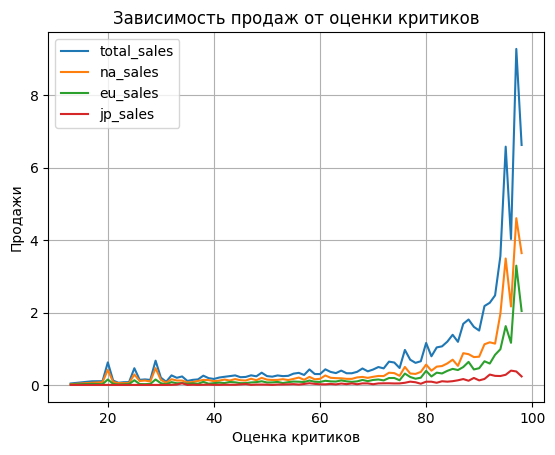

In [30]:
df['critic_score'] = df['critic_score'].astype('float')

na_sales_gr = df.groupby('critic_score')['na_sales'].mean()
eu_sales_gr = df.groupby('critic_score')['eu_sales'].mean()
jp_sales_gr = df.groupby('critic_score')['jp_sales'].mean()

total_sales_gr = df.groupby('critic_score')['total_sales'].mean()
plt.title('Зависимость продаж от оценки критиков')
plt.grid(True)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')

plt.plot(total_sales_gr.index, total_sales_gr.values, label='total_sales')
plt.plot(na_sales_gr.index, na_sales_gr.values, label='na_sales')
plt.plot(eu_sales_gr.index, eu_sales_gr.values, label='eu_sales')
plt.plot(jp_sales_gr.index, jp_sales_gr.values, label='jp_sales')
plt.legend()

print('Коэффициент корреляции общих продаж и оценки критиков:', df['total_sales'].corr(df['critic_score']))

Для продаж как по регионам, так и для глобальных нет сильной зависимости уровня продаж от оценки критиков. Высокая оценка критиков (более 90 баллов) показывает одновременно и самые большие продажи, однако игры с небольшими продажами (до 0.5) имеют весь спектр оценок критиков, то есть подстановка вычисленной каким-либо методом оценки едва ли даст корректный результат, так как по статистике оценка может быть и 5, и 80 баллов.

С учётом того, что среди пропусков 85% (7 255/ 8 576) значений продаж меньше 0.5, не будем производить замены пропусков в столбце `critic_score` оценочными значениями на базе продаж игр.

In [31]:
critic_null = df[df['critic_score'].isnull()]
print('Количество пропусков в столбце critic_score', len(critic_null['critic_score'])) 
gr_cr = critic_null.groupby('total_sales')['total_sales'].count()
print('Количество строк с продажами меньше 0.5 среди пропусков', sum(gr_cr[gr_cr.index<0.5]))

Количество пропусков в столбце critic_score 8576
Количество строк с продажами меньше 0.5 среди пропусков 7167


Можно было бы попробовать заполнить столбец `critic_score` при помощи столбца `user_score` при наличии корреляции, но из 8 576 пропусков в столбце `critic_score` 8 003 пропуска (93%) совпадают с пропусками в столбце `user_score`.

In [32]:
len(df[(df['critic_score'].isna())&(df['user_score'].isna())])

8003

*Вывод*: оставляем пропуски без изменений.

Возможно, множество игр с невысокими продажами действительно никто не оценивал, так как игр слишком много.

4. Пропуски в столбце `user_score`

В столбце очень много пропусков - 55%. Здесь также настоящие значения строчек очень важны, а замены пропусков явно приведут к сильным искажениям для прогноза на 2017 год.  Проверим вдруг здесь есть сильная зависимость между оценкой пользователей и продажами, тогда можно будет попытаться заменить пропуски близкими значениями оценок для подобного уровня продаж.

Коэффициент корреляции общих продаж и оценки пользователей: 0.24550668717736332


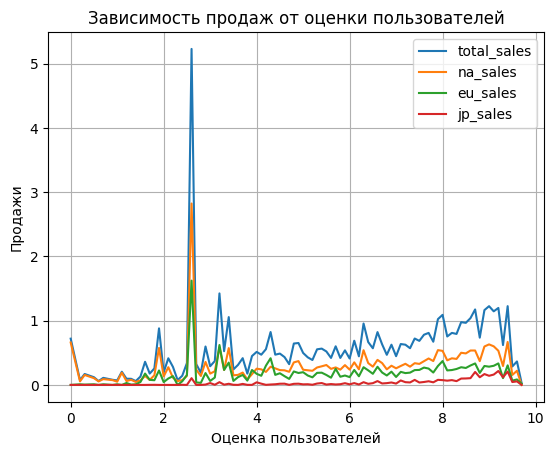

In [33]:
# перезапишем значения переменных, так как в дальнейшем они нам не нужны

na_sales_gr = df.groupby('user_score')['na_sales'].mean()
eu_sales_gr = df.groupby('user_score')['eu_sales'].mean()
jp_sales_gr = df.groupby('user_score')['jp_sales'].mean()

total_sales_gr = df.groupby('user_score')['total_sales'].mean()
plt.title('Зависимость продаж от оценки пользователей')
plt.grid(True)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')

plt.plot(total_sales_gr.index, total_sales_gr.values, label='total_sales')
plt.plot(na_sales_gr.index, na_sales_gr.values, label='na_sales')
plt.plot(eu_sales_gr.index, eu_sales_gr.values, label='eu_sales')
plt.plot(jp_sales_gr.index, jp_sales_gr.values, label='jp_sales')
plt.legend()

print('Коэффициент корреляции общих продаж и оценки пользователей:', df['total_sales'].corr(df['critic_score']))

Корреляция также низкая, что видно и на графике. Много пиков, где достаточно высокие продажи при низких оценках пользователей. Замена на базе продаж сильно исказит аналитику. 

Здесь ситуация с одновременными пропусками в оценке пользователей и в оценке критиков чуть лучше (8 003/ 9 123 = 88% совпадений). Можно посмотреть на корреляцию между оценками пользователей и критиков.

In [34]:
df['user_score'].corr(df['critic_score'])

0.580877832076724

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

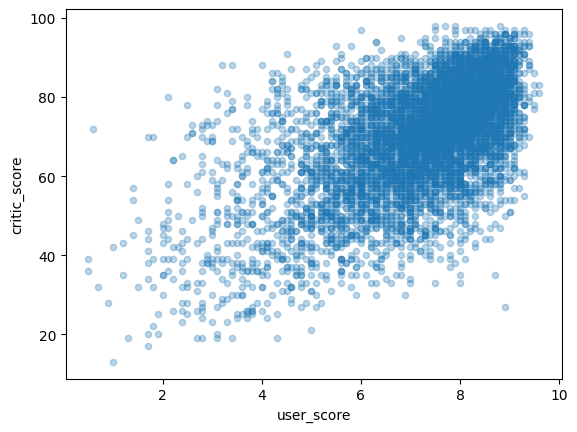

In [35]:
df.plot(x='user_score', y='critic_score', kind='scatter', alpha=0.3) 

Не самая плохая зависимость между столбцами, но всё же далеко отстоящая от единицы (сильной зависимости). При таком рассеивании "попасть" через оценку критиков в правильную оценку пользователей достаточно сложно. Оставим пропуски. В дальнейшем исследовании при возникновении необходимости рассмотрим вариант подобной замены.

5. Пропуски в столбце `rating`

В столбце 40,5% пропусков, однако здесь невозможно искать зависимости для заполнения: это рейтинг ESRB. Он либо такой, либо неизвестен. 
- «E» («Everyone») — «Для всех»
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «K-A» («for Kids to Adults»)
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет
- «EC» («Early childhood») — «Для детей младшего возраста»
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [36]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Если посмотреть несколько последних по дате выхода игр с достаточно высокими продажами, то рейтинг ESRB у них есть. Однако общей базы для составления кода по замене рейтинга у нас нет. Придётся оставить пропуски.

P.S. Например, Star Wars Battlefront (2015) имеет рейтинг T.

In [37]:
eg = df[df['rating'].isna()]
eg[(eg['total_sales']>5)&(eg['year_of_release']>2013)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27


## Поиск дубликатов

Проверим данные на наличие явных дубликтов (полностью одинаковые строки, во всех столбцах одинаковые значения).
Явных дубликатов нет.

In [38]:
df.duplicated().sum()

0

Посмотрим неявные дубликаты:

In [39]:
df.duplicated(subset=['name','platform']).sum()

4

In [40]:
dpl = df.duplicated(subset=['name','platform'])
df[dpl == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
4127,Sonic the Hedgehog,PS3,2006,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+,0.48
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


Если мы посмотрим на эти 4 дубликата, то увидим, что два из них - это одна и та же игра (Need for Speed: Most Wanted) на две разные платформы, и у этой игры разные годы выпуска (возможно, это дополнения к игре), а у двух оставшихся игр ощутимо разные продажи в повторе.
Оставим эти дубликаты, как есть.

In [41]:
display(df[(df['name']=='Need for Speed: Most Wanted')&(df['platform']=='X360')])
display(df[(df['name']=='Sonic the Hedgehog')&(df['platform']=='PS3')])
display(df[(df['name']=='Need for Speed: Most Wanted')&(df['platform']=='PC')])
df[(df['name']=='Madden NFL 13')&(df['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T,0.08


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


**Выводы по подготовке данных:**
1. Названия столбцов приведены к нижнему регистру
2. Изменены форматы столбцов `year_of_release` (на int) и `user_score` (оценка 'tbd' (не определена) заменена на NaN) (на float)
3. После работы с пропусками:
- удалены 2 строки с пустыми именами и жанрами
- заменены часть пропущенных годов выпуска в случае выхода игры на нескольких платформах (на последний год выпуска)
- обнаружено очень много пропусков (более 50%) в столбцах с оценками пользователей и критиков, однако из-за низкой корреляции с продажами, а также из-за пересечения пропусков одновременно в обоих столбцах замены будут сильно искажать аналитику, и лучше оставить данные, как есть. Видимо, не все игры проходят оценку критиков или пользователей, по крайней мере в одной системе координат, откуда взяты оценки в таблице
- обнаружено много пропусков (40.5%) в столбце `rating` ESRB, который невозможно заполнить "наукоподобно". При этом рейтинг, если его поискать, всё-таки существует. Возможно, это некая техническая ошибка при выгрузке данных, с которой надо разбираться совместно со специалистами.
4. Данные не содержат дубликаты. Есть 2 игры с одинаковым названием и платформой, однако они имеют разные продажи. Возможно, это дополнения к первоначальной игре, либо определенная версия для конкретного региона.


# Исследовательский анализ данных <a id='explor'></a>

## Распределение игр по годам. Важны ли данные за все периоды?

,year_of_release,games_quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Text(0, 0.5, 'продажи, млн. копий')

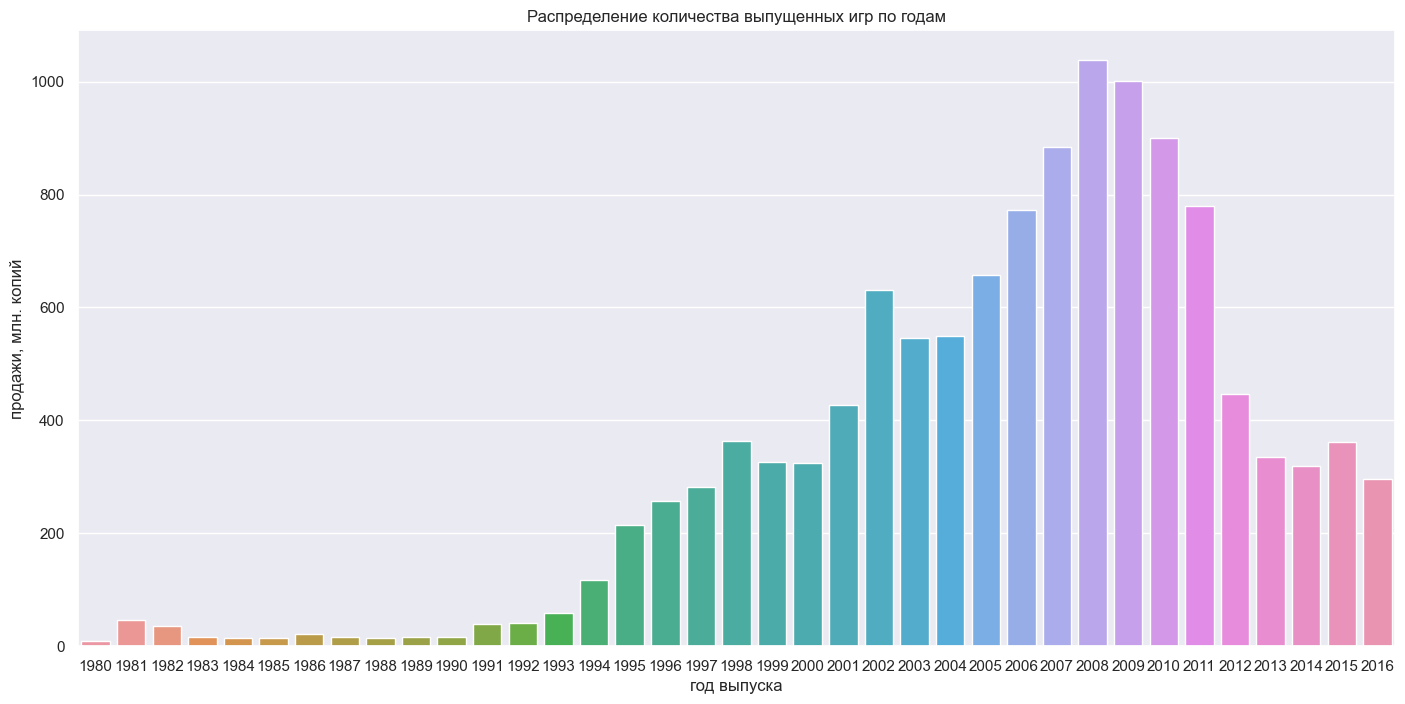

In [42]:
# сгруппируем данные, чтобы посмотреть количество выпущенных игр по годам
df_dupl = df.drop_duplicates(subset=['name','year_of_release' ], keep='first')

years_games = df_dupl.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index() 

# переименуем столбцы
years_games.rename(columns= {'name': 'games_quantity'},inplace=True) 

# отобразим в табличной форме
display(years_games)

# построим график распределения колиечества игр по годам с помощью seaborn

sns.set(rc={'figure.figsize':(17,8)})
sns.barplot(data = years_games, x='year_of_release', y='games_quantity')
plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('продажи, млн. копий')

Из графика видно, как происходило развитие игр на различных платформах. 

Начало роста с развитием технологий в 90-х, пик продаж в 2000-е годы, а затем резкий спад с 2010 года под влиянием трёх основных факторов:
- финансового кризиса конца 2000-х годов, который перевёл покупку приставки и видеоигр в предметы роскоши
- развития мобильных устройств, уход геймеров от приставок к смартфонам и другим более функциональным, чем приставка, гаджетам
- исчерпание идей для игр: многие геймеры начинают жаловаться, что все новые игры - это в основном равитие/дополнение старых или "где-то мы это уже видели"

Скорее всего, "мир уже не станет прежним" (как минимум из-за второго пункта), поэтому в прогнозе необходимо учитывать только актуальные данные: 2014-2016 годы.

## Изменение продаж по платформам. Платформы с наибольшими суммарными продажами по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Будем использовать данные с 2014 года, чтобы учесть самые последние изменения на рынке игр и то, что данные за 2016 год не полные (2-2.5 лет будет достаточно, но и неактуальная информация будет исключена).

In [43]:
df_2014 = df[df['year_of_release']>=2014]

platform_pt = df_2014.pivot_table(
    values='total_sales', 
    index= 'platform', 
    aggfunc='sum'
).sort_values(by='total_sales', ascending=False)

# посчитаем долю продаж от общих продаж для каждой платформы

total_sales = sum(platform_pt['total_sales'])
platform_pt['platform_share_%'] = round((platform_pt['total_sales']/total_sales*100),1)

platform_pt

,total_sales,platform_share_%
platform,,
PS4,288.15,39.5
XOne,140.36,19.2
3DS,86.68,11.9
PS3,68.18,9.3
X360,48.22,6.6
WiiU,42.98,5.9
PC,27.40,3.8
PSV,22.40,3.1
Wii,5.07,0.7


Выделим *топ 6* платформ. Это платформы с продажами более 40 млн. копий.

In [44]:
platform_top = platform_pt[platform_pt['total_sales']>=40]
print('Платформы с продажами более 40 млн. копий дают:', round(sum(platform_top['platform_share_%'])),'% всех продаж') 

Платформы с продажами более 40 млн. копий дают: 92 % всех продаж


In [45]:
# функция для создания мини-сводных таблиц (mini_pt) для каждой из топ-10 платформ
# на базе этих сводных таблиц будем строить графики для каждой из топ-10 платформ

def platform_years_mini_pt(platform):
    
    platf_filter = df_2014[(df_2014['platform'] == platform)]
    
    mini_pt = platf_filter.pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum'
    ).sort_values(
        'year_of_release', ascending=False
    )
    
    return mini_pt

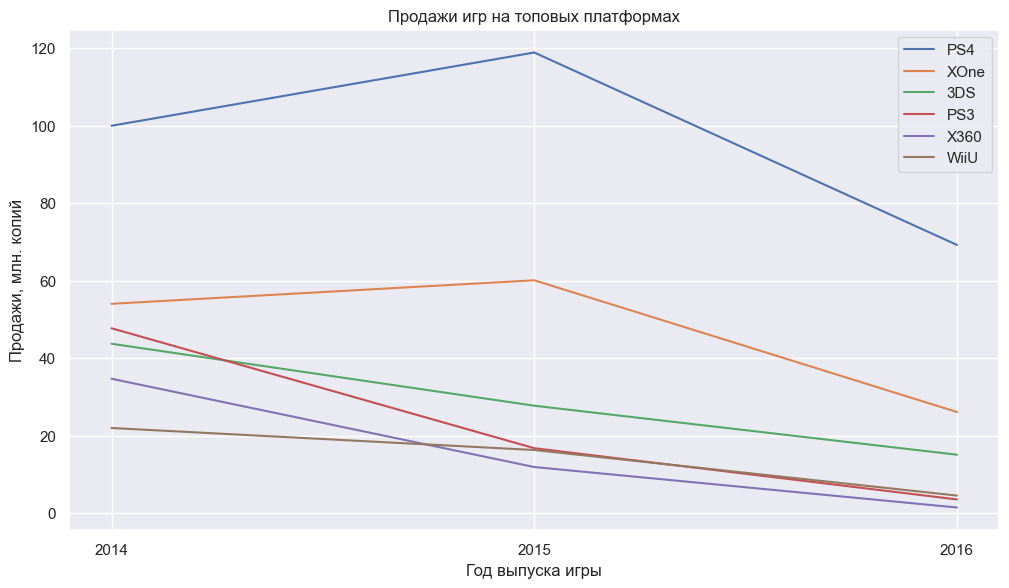

In [46]:
plt.figure(figsize=(12,6.5))
plt.title('Продажи игр на топовых платформах')
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи, млн. копий')

# пройдёмся циклом только по топ-10 платформ, применяя функцию, строящую сводную таблицу по платформе
for platform in platform_top.index:
    sns.lineplot(data=platform_years_mini_pt(platform)['total_sales'], label=platform)
    plt.xticks([2014, 2015, 2016], ['2014', '2015', '2016'])
    plt.legend()

Из графика видно, что максимальные продажи в последние годы у PS4, со значительным отставанием следует XOne. И все топовые платформы объединяет тот факт, что продажи по ним с 2015 года падают.

Чтобы ответить на вопрос **За какой характерный срок появляются новые и исчезают старые платформы?** вернёмся "назад в прошлое" и возьмём данные с 2005 года (начало максимального роста продаж).

In [47]:
# соберём данные с 2005 года

df_2005 = df[df['year_of_release']>=2005]

platform_pt_2005 = df_2005.pivot_table(
    values='total_sales', 
    index= 'platform', 
    aggfunc='sum'
).sort_values(by='total_sales', ascending=False)

# выделим топ 10 платформ. Это платформы с продажами более 100
platform_top_2005 = platform_pt_2005[platform_pt_2005['total_sales']>=100]

# перепишем функцию "назад" в 2005 год

def platform_years_mini_pt_2005(platform):
    
    platf_filter = df_2005[(df_2005['platform'] == platform)]
    
    mini_pt_2005 = platf_filter.pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum'
    ).sort_values('year_of_release', ascending=False
                 )
    
    return mini_pt_2005

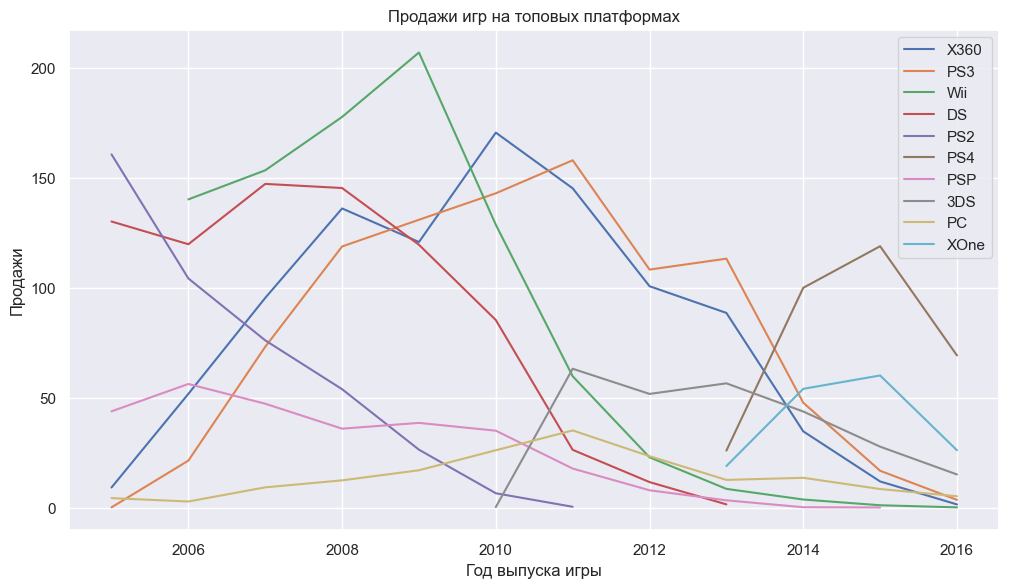

In [48]:
# построим графики

plt.figure(figsize=(12,6.5))
plt.title('Продажи игр на топовых платформах')
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи')

# пройдёмся циклом только по топ-10 платформ, применяя функцию, строящую сводную таблицу по платформе
for platform in platform_top_2005.index:
    sns.lineplot(data=platform_years_mini_pt_2005(platform)['total_sales'], label=platform)
    plt.legend()

Из графиков видно, что платформы "живут" около 10 лет, однако вычислим значение за 2005-2016 годы точнее.

In [49]:
# сгруппируем нужные нам данные по платформам и годам
platform_years_2005 = df_2005.pivot_table(
    values='total_sales',
    index=('platform','year_of_release'),
    aggfunc='sum'
).reset_index()

years_count = []

#посчитаем сколько лет выходят игры на топ-10 платформ
for platform in platform_top.index:
    years_count.append(platform_years_2005[platform_years_2005['platform']==platform]['year_of_release'].count())

# построим таблицу по топ-10 платформ и количеству лет выпуска игр (срок жизни платформы)
platf_years_mini = {'platform': platform_top.index, 'N_years_of_release': years_count}
platf_years_mini = pd.DataFrame(data=platf_years_mini)
platf_years_mini

,platform,N_years_of_release
0,PS4,4
1,XOne,4
2,3DS,7
3,PS3,12
4,X360,12
5,WiiU,5


In [50]:
print('В среднем срок жизни одной из ТОП-10 платформ', platf_years_mini['N_years_of_release'].mean(), 'лет')

В среднем срок жизни одной из ТОП-10 платформ 7.333333333333333 лет


**Выводы:**
1. Продажи по платформам начали расти с начала 90-х годов, резкий рост произошёл после 2001 года, а после 2011 года произошло резкое падение, связанное как с мировой ситуацией, так и с особенностями игровой индустрии.


2. К 2016 году остались такие платформы как: PS4, XOne и 3DS (в порядке убываний проданных копий игр для них), а также "доживащие свой век" PS3, X360 и WiiU (количество проданных копий на них уже стремитсчя к нулю), поэтому их для планирования уже не рассматриваем.


3. Платформы появляются и исчезают примерно за 9 лет. Нам важно отметить, что в 2013 году появились и ещё не исчезли PS4 и XOne. Продажи на этих платформах уже начали падать, но не приблизились к нулю, как по остальным ранее прибыльным платформам из топ-10.

## График «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [51]:
# создадим таблицу с данными за 2005-2016 год только по топ-10 платформ
top_platforms_2005 = df_2005[df_2005['platform'].isin(platform_top.index)]
top_platforms_2005['total_sales'].describe()

count    3871.000000
mean        0.701622
std         1.472809
min         0.000000
25%         0.090000
50%         0.240000
75%         0.690000
max        21.820000
Name: total_sales, dtype: float64

Для того, чтобы можно было получить "читаемые" графики и с точки зрения здравого смысла (где выбросы - это нечто слабо поддающееся прогнозированию) удалим выбросы с графиков, ограничив пределы пострения графика:

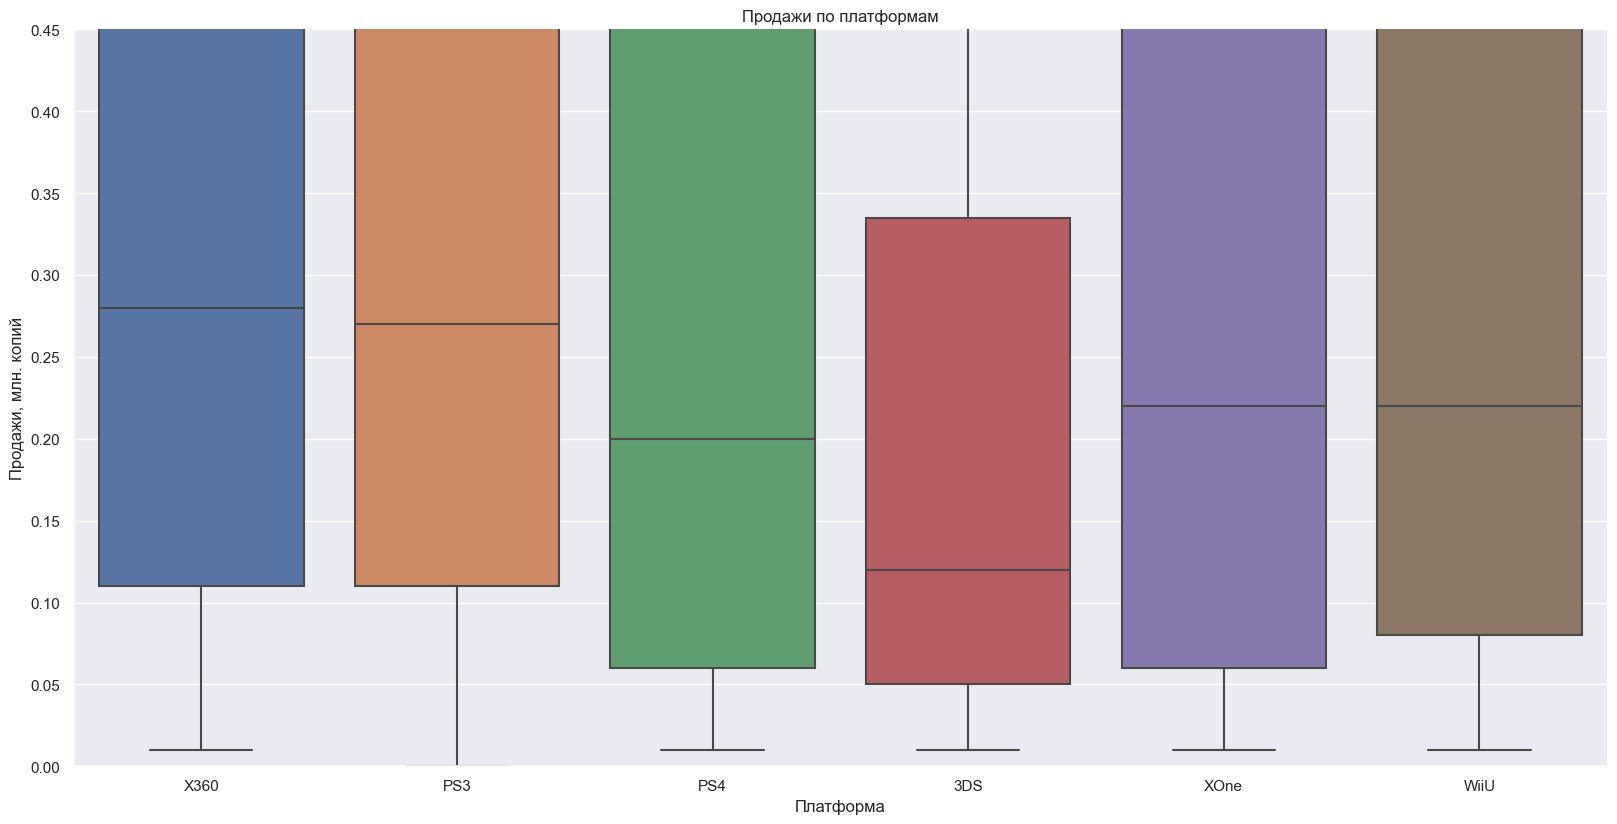

In [52]:
# по очищенныи данным построим "ящики с усами"
sns.catplot(x='platform',
            y='total_sales',
            kind='box',
            data=top_platforms_2005,
           height=8,
           aspect=2).set (title='Продажи по платформам') 
plt.ylim(0,0.45)
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий')
plt.show()

**Выводы:**

Из графика видно, что медианные продажи у самых популярных приставок около 0.1-0.2 (ближе к 0.2). Самые высокие медианные продажи были у X360 и PS3, но у X360 разброс значений продаж меньше, а самые низкие медианные продажи у PC (в целом 75% значений продаж у данной приставки ниже, чем у всех остальных).


У "оставшихся в живых" к 2016 году PS4 и XOne медианные продажи выше у XOne, что важно для нашего исследования, а разброс значений почти одинаковый.

##  Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Диаграмму рассеяния и корреляцию между отзывами и продажами. 

In [53]:
def rating_corr_pt(platform):
    platf_filter = df_2005[(df_2005['platform'] == platform)]
    mini_pt_cor = platf_filter[['total_sales', 'critic_score', 'user_score']].dropna().reset_index(drop=True)
    return mini_pt_cor

Зависимость продаж от оценки критиков:

PS4 0.4058948014583667
XOne 0.41042203561296403
3DS 0.3384264578906769
PS3 0.42769200738740615
X360 0.38766979749831904
WiiU 0.350882422488643


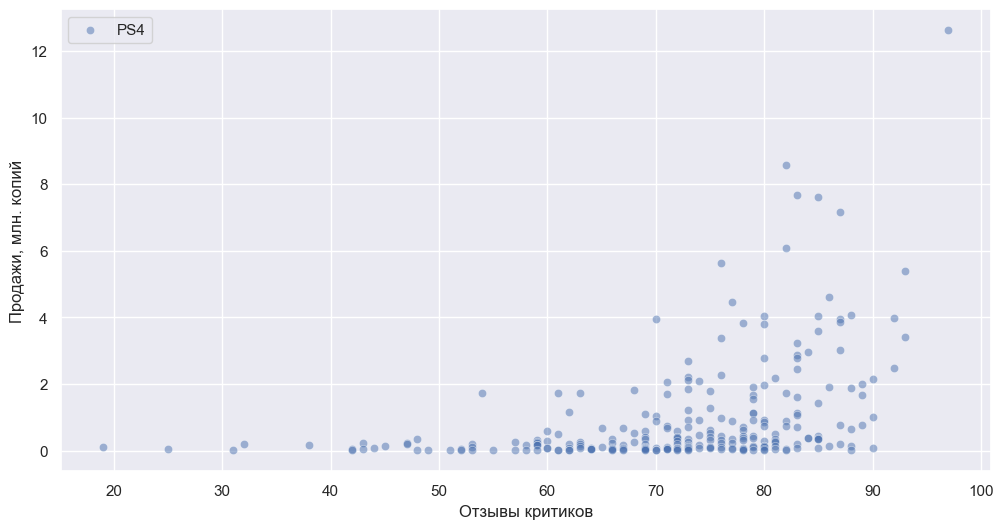

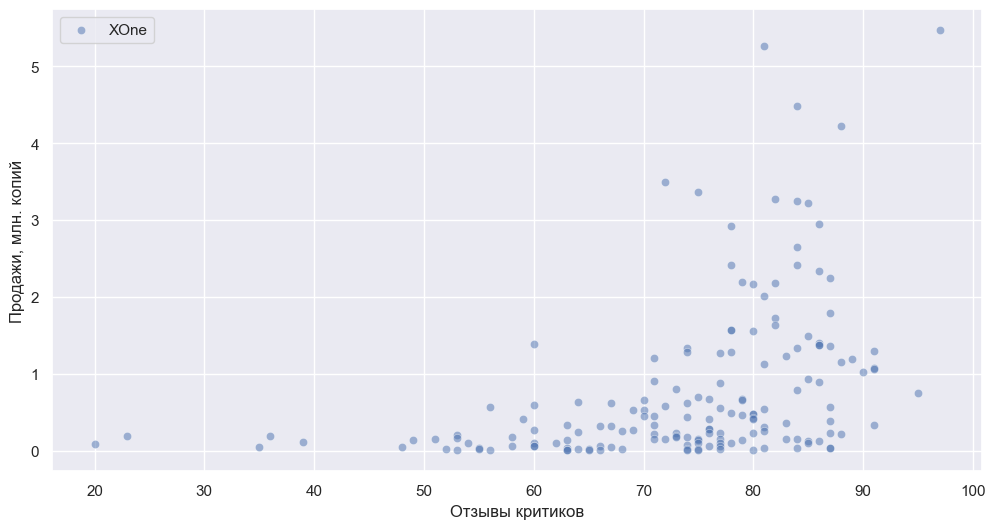

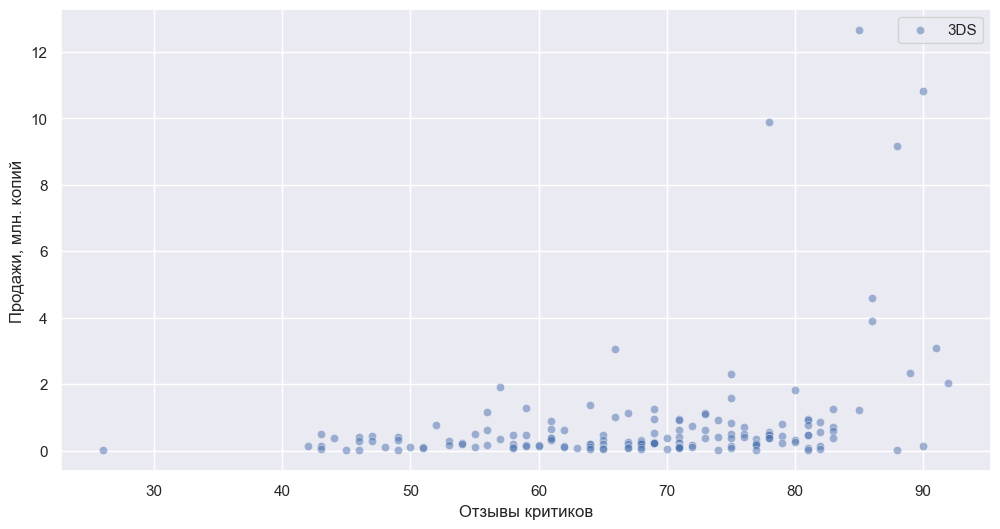

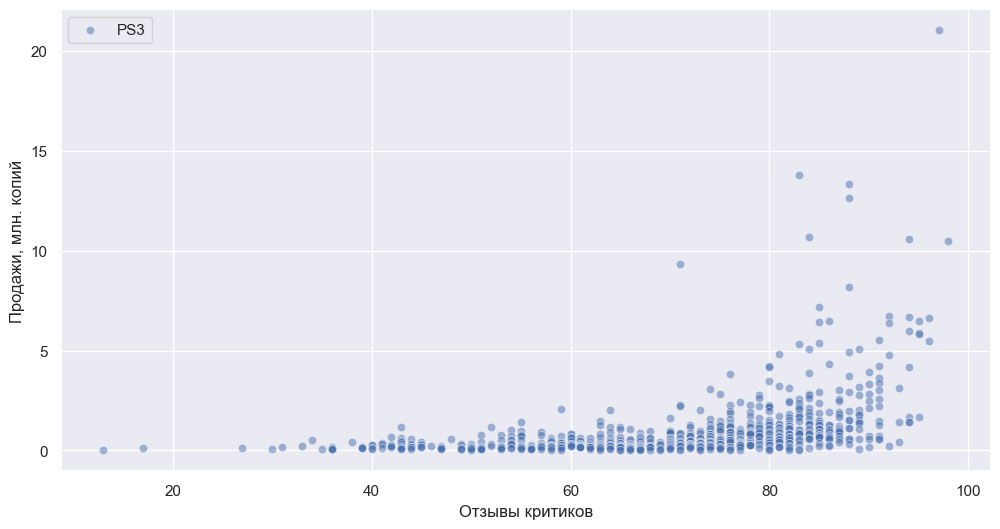

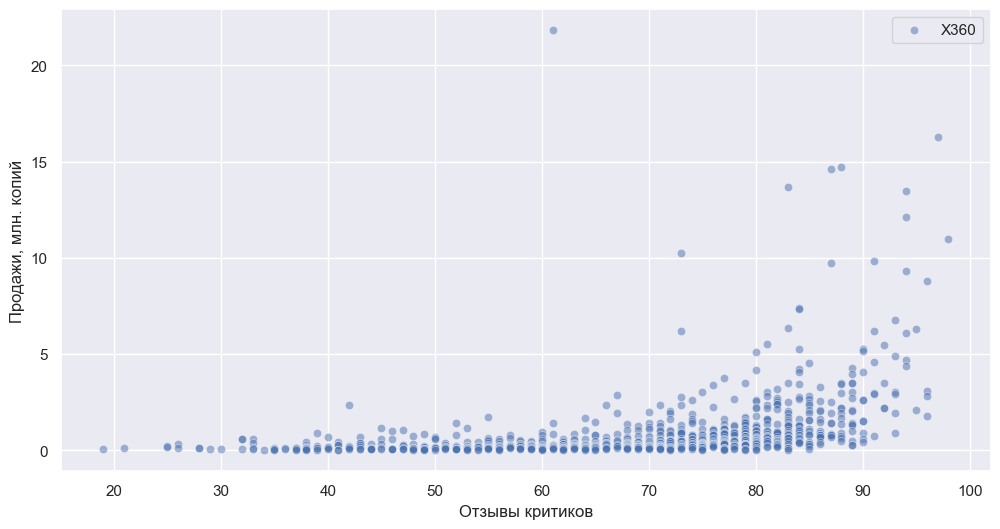

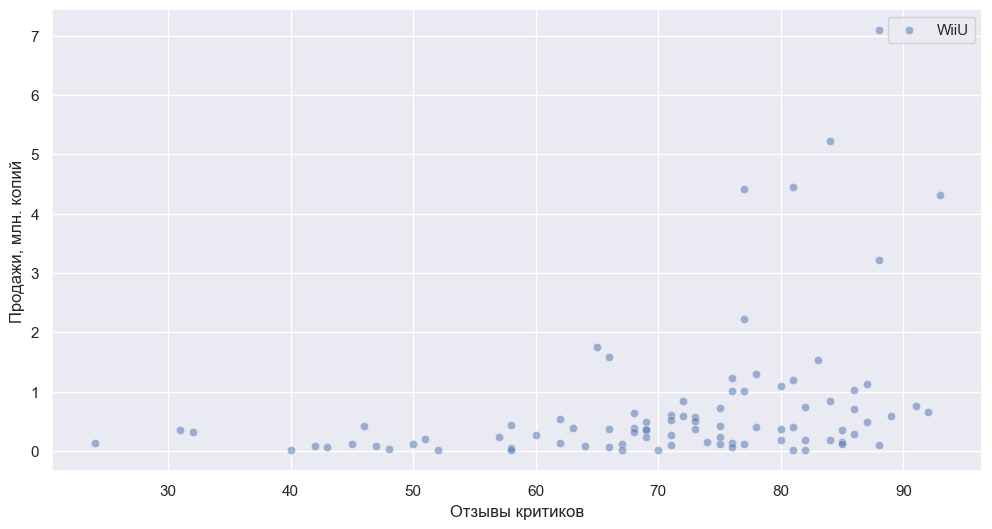

In [54]:
print('Зависимость продаж от оценки критиков:')
print()
for platform in platform_top.index:
    func =  rating_corr_pt(platform)
    cor = func['critic_score'].corr(func['total_sales'])
    print(platform, cor)
    plt.figure(figsize=(12,6))
    sns.scatterplot(x='critic_score', y='total_sales', data=func, alpha=0.5, label=platform)
    sns.scatterplot()
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Продажи, млн. копий')
        

Зависимость продаж от оценки пользователей:
PS4 -0.0336249759652888
XOne -0.09400318326920859
3DS 0.23244358107814939
PS3 0.14332180877966597
X360 0.10934073378228201
WiiU 0.3918479505297129


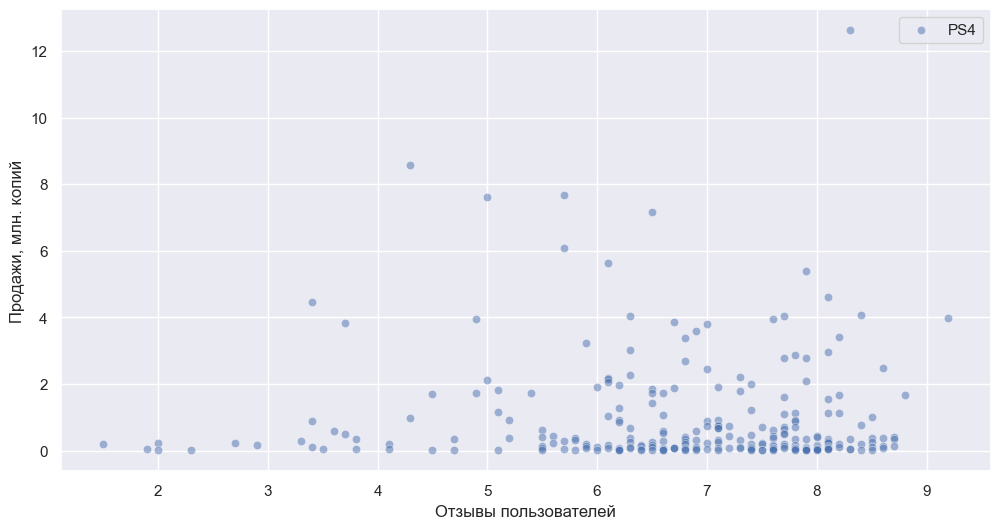

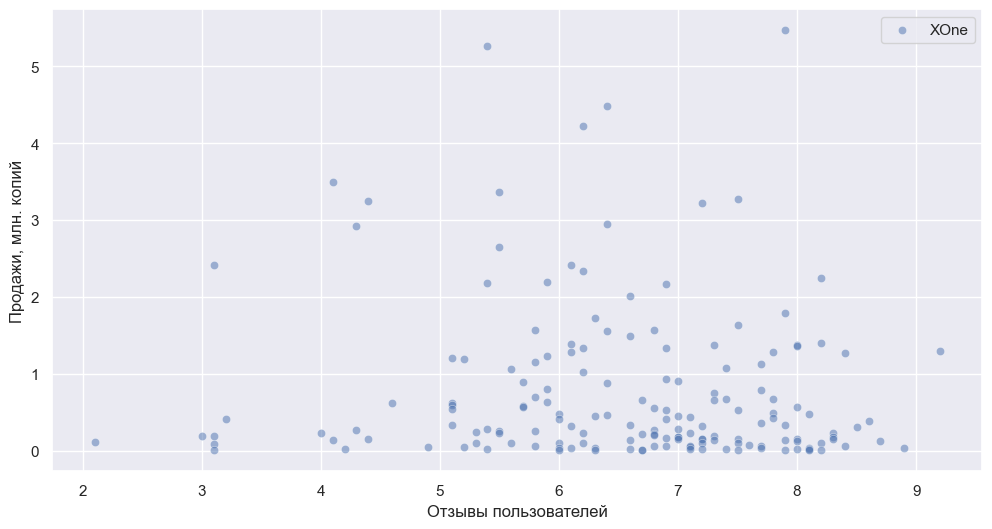

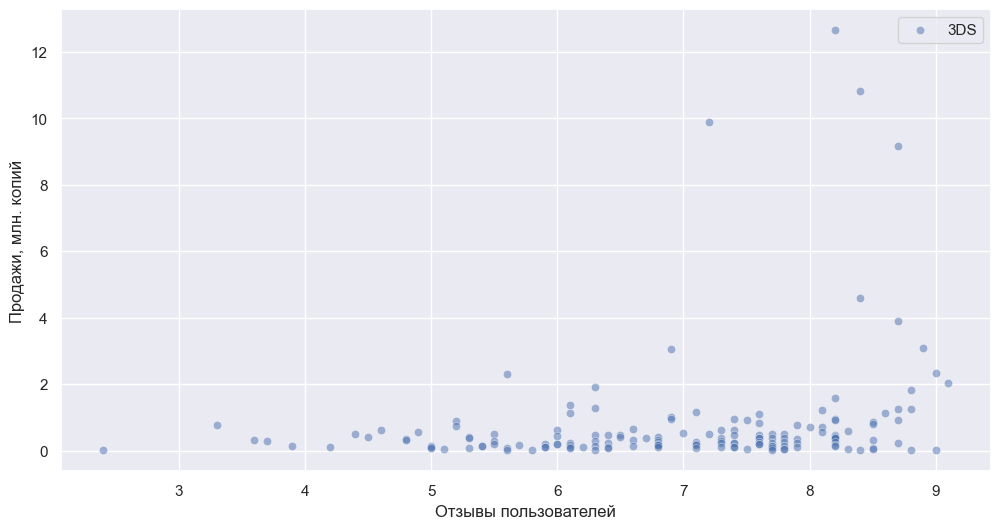

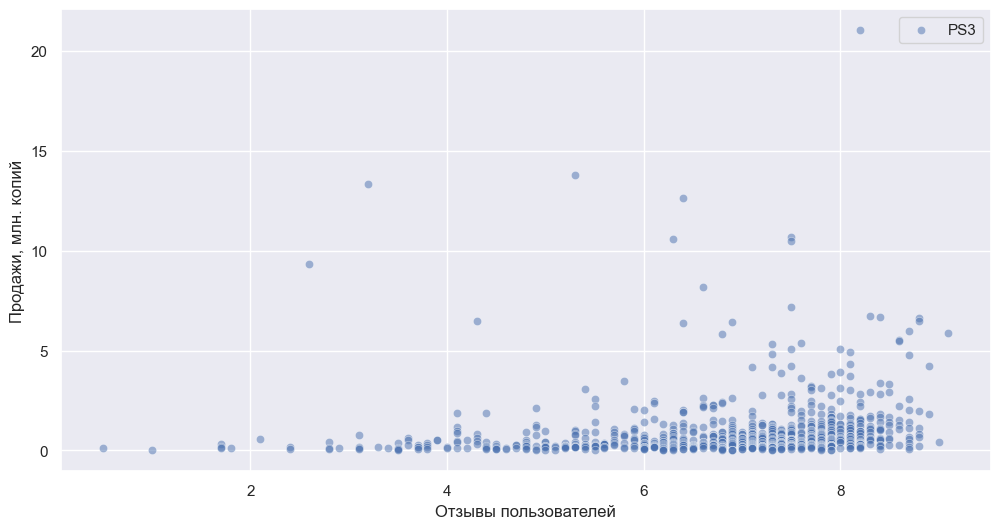

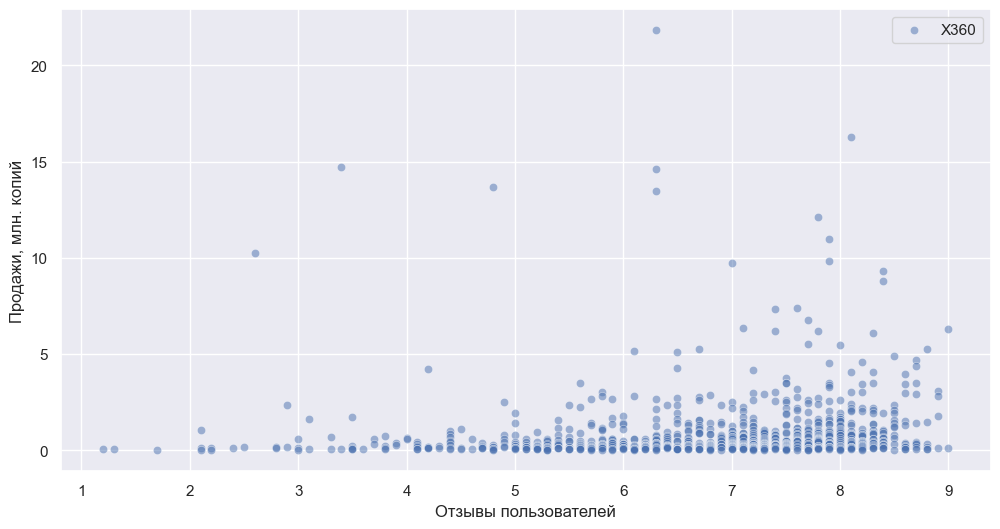

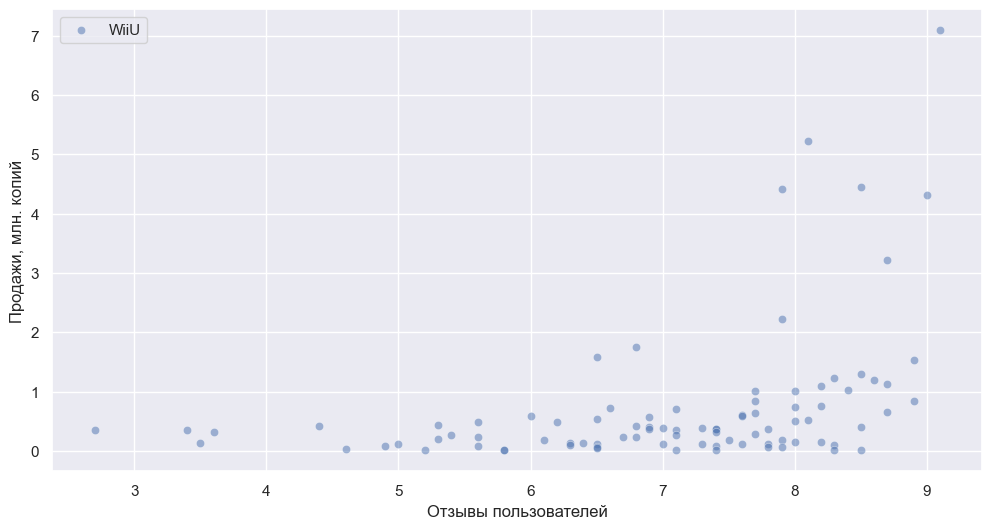

In [55]:
print('Зависимость продаж от оценки пользователей:')
for platform in platform_top.index:
    func =  rating_corr_pt(platform)
    cor = func['user_score'].corr(func['total_sales'])
    print(platform, cor)
    plt.figure(figsize=(12,6))
    sns.scatterplot(x='user_score', y='total_sales', data=func, alpha=0.5, label=platform)
    sns.scatterplot()
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Продажи, млн. копий')

**Выводы:**
1. Оценки критиков демонстрируют прямую, средне-слабую корреляцию с объёмами продаж. Максимальная корреляция около 0.4 у семейства PS (PS2,3,4), XOne и X360. Однако по диаграммам рассеивания видно, что зависимость далеко не самая сильная. При высоких оценках критиков продажи выше, но далеко не всегда.
2. Оценки пользователей корреляции с объемами продаж почти не имеют. Максимальная корреляция всего 0.2 у PSP и 3DS (что очень далеко от единицы, то есть сильной зависимости). У некоторых популярных приставок (PS4 и PC) корреляция вообще отрицательная (очень близкая к нулю).
3. С высокой вероятностью продажи на других (не топовых) платформах) так же низко коррелируют с оценками критиков и оценками пользователей.


## Общее распределение игр по жанрам

Посмотрим сначала на жанры с максимальными суммарными продажами за период 2005-2016:

In [56]:
genres_2005 = df_2005.groupby('genre').agg({'total_sales':['sum','mean','median','count']}
                                     ).sort_values(by=('total_sales','sum'), ascending=False)

genres_2005['total_sales','mean'] = round(genres_2005['total_sales','mean'], 2)
genres_2005['total_sales','median'] = round(genres_2005['total_sales','median'], 2)
genres_2005

total_sales                   
                     sum  mean median count
genre                                      
Action           1219.00  0.47   0.17  2603
Sports            858.57  0.61   0.21  1399
Shooter           764.16  0.90   0.29   845
Misc              618.75  0.45   0.13  1380
Role-Playing      551.14  0.52   0.15  1069
Racing            355.43  0.55   0.17   643
Platform          303.54  0.72   0.18   424
Simulation        270.12  0.42   0.13   647
Fighting          208.30  0.45   0.16   458
Adventure         149.83  0.14   0.04  1066
Puzzle            110.93  0.28   0.09   403
Strategy           79.05  0.19   0.08   426

Посмотрим теперь на жанры с максимальными суммарными продажами за период 2014-2016, так как для планирования лучше брать этот временной диапазон.

In [57]:
df_2014 = df[df['year_of_release']>2013]
genres_2014 = df_2014.groupby('genre').agg({'total_sales':['sum','mean','median','count']}
                                     ).sort_values(by=('total_sales','sum'), ascending=False)

genres_2014['total_sales','mean'] = round(genres_2014['total_sales','mean'], 2)
genres_2014['total_sales','median'] = round(genres_2014['total_sales','median'], 2)
genres_2014

total_sales                   
                     sum  mean median count
genre                                      
Action            199.71  0.32   0.09   620
Shooter           170.94  1.34   0.52   128
Sports            109.48  0.68   0.18   161
Role-Playing      101.44  0.46   0.11   221
Misc               37.55  0.33   0.09   113
Fighting           28.22  0.47   0.12    60
Racing             27.52  0.40   0.09    69
Platform           18.09  0.48   0.14    38
Adventure          17.55  0.09   0.03   185
Simulation         13.13  0.30   0.10    44
Strategy            3.96  0.11   0.06    37
Puzzle              2.21  0.16   0.04    14

**Выводы:**
1. Как за долгосрочный (2005-2016), так и за краткосрочный период (2014-2016) в топ-5 входят жанры Action, Shooter, Sports, Role-Playing и Misc. Наименьшей популярностью пользуются Strategy и Puzzle
2. Наибольшими медианными (а также и средними) продажами обладает жанр Shooter. В этом жанре выпускается не так много игр, как в жанре Action, Sports и Role-Playing, что означает более низкую конкуренцию
3. У игр в жанре Action явно очень большая конкуренция, так как количество игр, выпускаемых в этом жанре максимально. В итоге медианные и средние продажи в этом жанре достаточно низкие (наименьшие в топ-5 популярных жанров)

# Портрет пользователя каждого региона <a id='portrait'></a>

Соберём по каждому региону топ-5 платформ и жанров, а также построим гистограмму продаж в зависимости от рейтинга ESRB.

In [58]:
import warnings
warnings.filterwarnings('ignore')

# поставим 'заглушку' на пустые значения в столбце 'rating', чтобы учесть эти данные

df_2014['rating'] = df_2014['rating'].replace(np.NaN, 'not_rated') 

# необходимые для создания функции сводные таблицы (по платформе, по жанру и по рейтингу)

top_platf_2014_pt = df_2014.pivot_table(
    values=('na_sales','eu_sales','jp_sales'),
    index='platform',
    aggfunc='sum').reset_index()

top_genre_2014_pt = df_2014.pivot_table(
    values=('na_sales','eu_sales','jp_sales'),
    index='genre',
    aggfunc='sum').reset_index()

df_2014_rating = df_2014.pivot_table(
    values = ('eu_sales','jp_sales','na_sales'),
    index='rating',
    aggfunc='sum').reset_index()

# функця, выбирающая топ-5 платформ, топ-5 жанров и строящая гистограмму продаж от рейтинга ESRB для каждого региона
def reg_top_2014(reg):
    sales_pl_reg = top_platf_2014_pt[['platform',reg]].sort_values(by=reg,ascending=False).reset_index(drop=True).head()
    sales_pl_reg['share'] = round(sales_pl_reg[reg]/top_platf_2014_pt[reg].sum()*100,2)
    
    sales_genre_reg = top_genre_2014_pt[['genre',reg]].sort_values(by=reg,ascending=False).reset_index(drop=True).head()
    sales_genre_reg['share'] = round(sales_genre_reg[reg]/top_genre_2014_pt[reg].sum()*100,2)
    
    return sales_pl_reg, sales_genre_reg, df_2014_rating.plot(x='rating', y=reg, kind='bar', grid=True, figsize=(6,4))

## Европейский союз (EU)

**Посмотрим на продажи Европейского союза (`eu_sales`):**

(  platform  eu_sales  share
 0      PS4    130.04  48.00
 1     XOne     46.25  17.07
 2      PS3     25.54   9.43
 3       PC     18.22   6.72
 4      3DS     16.12   5.95,
           genre  eu_sales  share
 0        Action     74.93  27.66
 1       Shooter     65.52  24.18
 2        Sports     45.73  16.88
 3  Role-Playing     28.17  10.40
 4        Racing     14.13   5.22,
 <AxesSubplot:xlabel='rating'>)

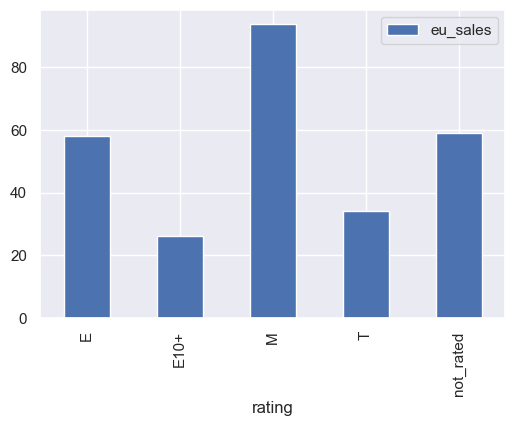

In [59]:
reg_top_2014('eu_sales')

С большим отрывом от других платформ в Европейском союзе лидирует PS4 (36% продаж), далее идёт PS3 (17% продаж). Европейцы предпочитают "японцев".

Самые популярные жанры - это Action и Shooter (30% и 22% продаж, соответственно).

По рейтингу ESRB лидируют игры с рейтингом M, то есть для взрослых (17+), что логично при обозначенных выше популярных жанрах.

## Североамериканский регион (NA)

**Посмотрим на продажи cевероамериканского региона (`na_sales`):**

(  platform  na_sales  share
 0      PS4     98.61  34.71
 1     XOne     81.27  28.60
 2     X360     28.30   9.96
 3      3DS     22.64   7.97
 4      PS3     22.05   7.76,
           genre  na_sales  share
 0       Shooter     79.02  27.81
 1        Action     72.59  25.55
 2        Sports     46.13  16.24
 3  Role-Playing     33.47  11.78
 4          Misc     15.05   5.30,
 <AxesSubplot:xlabel='rating'>)

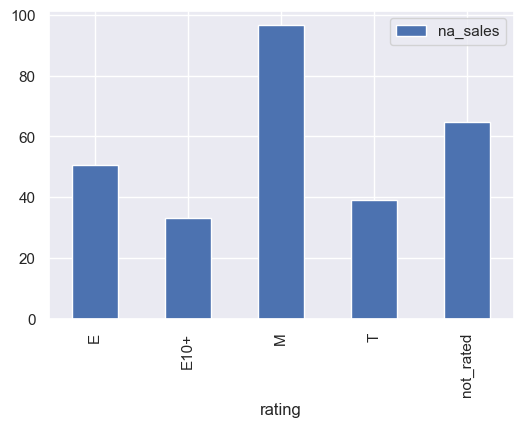

In [60]:
reg_top_2014('na_sales')

Здесь три лидирующие приставки: PS4, XOne и X360 (24% у PS4, а последние две - американские пдатформы, поэтому логично, что 21 + 19 % = 40% продаж приходятся на американские платформы).

Здесь также предпочитают жанры Action и Shooter, что, видимо, тянет за собой и соответсвующий рейтинг ESRB M - для взрослых, 17+.

## Япония (JP)

**Посмотрим на продажи в Японии (`jp_sales`):**

(  platform  jp_sales  share
 0      3DS     44.24  47.52
 1      PS4     15.02  16.13
 2      PSV     14.54  15.62
 3      PS3     11.22  12.05
 4     WiiU      7.31   7.85,
           genre  jp_sales  share
 0  Role-Playing     31.16  33.47
 1        Action     29.58  31.78
 2      Fighting      6.37   6.84
 3          Misc      5.61   6.03
 4       Shooter      4.87   5.23,
 <AxesSubplot:xlabel='rating'>)

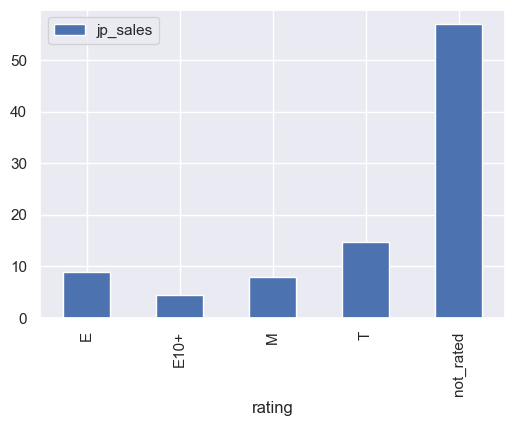

In [61]:
reg_top_2014('jp_sales')

Посмотрим на названия игр, которые не имеют рейтинга ESRB:

In [62]:
set(df[(df['jp_sales']>0)&(df['rating']=='not_rated')]['name'])

set()

Японцы предпочитают "японцев": с большим отрывом от остальных лидирует 3DS (48% продаж), а далее идёт PS3.

Здесь иная "жанровая" ситуация: лидируют жанр Role-Playing (36% продаж) и Action (29% продаж).

C рейтингом ESRB в данном регионе также интересная ситуация: большая часть продаваемых игр не имеет данного рейтинга. Если посмотреть на названия игр, то среди них очень много японских названий. 

Как нам известно:
*Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.*

Скорее всего игры, созданные в Японии, не оцениваются данной организацией, зато активно покупаются самими японцами. Отсюда такой перекос в распределении рейтинга в сторону его отсутствия.

**Выводы**:

Рынки игр различаются в регионах как по платформам, так и по жанрам и, как следствие, по рейтингу ESRB:


1. Европейский союз предпочитает японские приставки (PS4) и взрослые игры в стиле Action и Shooter

2. Северная Америка верна американскому производителю и выбирает X360 и XOne, но также и PS4. Лидируют взрослые игры в стиле Action и Shooter

3. Япония пользуется "отечественными" приставками: 3DS и версиями PS. Любимый жанр: Role-Playing (на втором месте Action). Большинство игр не имеют рейтинга ESRB, так как произведены в самой Японии и не попадают под оценку ESRB.

# Проверка гипотез <a id='hyp'></a>

Проверять обе гипотезы будем специальным методом Python для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind. В начале проекта мы уже вызвали для этого scipy.

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [63]:
# фильтр нужной информации для платформ Xbox One и PC
xbox_rating = df_2014[df_2014['platform']=='XOne']['user_score']

pc_rating = df_2014[df_2014['platform']=='PC']['user_score']

# дисперсия для определения параметра 'equal_var'

print('XOne дисперсия', round(np.var(xbox_rating),3))
print('PC дисперсия', round(np.var(pc_rating),3))

alpha = 0.05

results = st.ttest_ind(xbox_rating.dropna(), pc_rating.dropna(), equal_var=False)

print()
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

XOne дисперсия 1.88
PC дисперсия 2.893

p-значение: 0.13923712043548309
Не получилось отвергнуть нулевую гипотезу


Зададим пороговое значение alpha 0.05 (5%), так как в случае со средним рейтингом платформ вероятность ошибки 5% не критична.

Из-за того, что дисперсии у платформ отличаются достаточно значительно: на 20% (2.279/1.897), то зададим параметр equal_var=False.

*Нулевая гипотеза:*
Средние пользовательские рейтинги платформ Xbox One и PC равны


*Альтернативная гипотеза:*
Средние пользовательские рейтинги платформ Xbox One и PC не равны

Значение p-value равно 0.2%. Таким образом, отвергаем Нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC различны. Крайне маловероятно получить одинаковые рейтинги.

Посчитаем средние рейтинги по нашей выборке (действительно, разные):

In [64]:
print("Средний рейтинг XOne:", xbox_rating.mean())
print("Средний рейтинг PC:", pc_rating.mean())

Средний рейтинг XOne: 6.594545454545454
Средний рейтинг PC: 6.316260162601626


## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [65]:
action_rating = df_2014[df_2014['genre']=='Action']['user_score']

sports_rating = df_2014[df_2014['genre']=='Sports']['user_score']

print('Дисперсия жанра Action', round(np.var(action_rating),3))
print('Дисперсия жанра Sports', round(np.var(sports_rating),3))

alpha = .01

results = st.ttest_ind(action_rating.dropna(), sports_rating.dropna(), equal_var=False)

print()

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия жанра Action 1.896
Дисперсия жанра Sports 3.42

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


Зададим пороговое значение alpha 0.05 (5%), так как в случае со средним рейтингом жанров вероятность ошибки 5% не критична.

Из-за того, что дисперсии у платформ отличаются достаточно значительно: на 44% (2.669/1.897), то зададим параметр equal_var=False.

*Нулевая гипотеза (должна содержать равенство, поэтому переформулируем):* 
Средние пользовательские рейтинги жанров Action и Sports равны


*Альтернативная гипотеза:*
Средние пользовательские рейтинги жанров Action и Sports не равны

Значение p-value близко к нулю. Таким образом, отвергаем Нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различны. Крайне маловероятно получить одинаковые рейтинги.

Посмотрим на средние по нашей выборке (действительно различны).

In [66]:
print("Средний рейтинг Action:", action_rating.mean())
print("Средний рейтинг Sports:", sports_rating.mean())

Средний рейтинг Action: 6.766442953020134
Средний рейтинг Sports: 5.225196850393701


# Общий вывод <a id='summary'></a>

Мы изучили продажи игр различных жанров и для различных платформ за 1985-2016 годы. 


**В результате было выявлено много полезных для планирования 2017 года закономерностей:**


1. Активное развитие рынок игр получил с начала 2000-х годов, достиг пика в 2008-2009 гг. и резко упал в 2012 г. (со стагнацией до 2016 года) из-за мирового кризиса, развития мобильных гаджетов и истощения фантазии игровых сценаристов (начало штампования одних и тех же сюжетов). Таким образом, актуальная информация для прогноза - это 2014-2016 годы.


2. Средний срок жизни (цикл роста и падения продаж) платформы с момента активного развития рынка (2005 г.) - около 9 лет. В 2016 хорошие (но уже падающие продажи) остались на двух платформах: XOne и PS4.


3. Медианные продажи у обеих платформ XOne и PS4 находятся на уровне 0.1, а 75% продаж приносят от 0.05 до 0.35.


4. Популярность жанров и платформ в мире различается. Потенциально прибыльней будет игра, которая будет поддерживаться разными платформами, а не выходить эксклюзивно под одну.


5. Больше всего продаж у игр в жанре Action (даже в Японии жанр на втором месте).


6. В основном самые высокие суммарные продажи у игр с рейтингом ESRB 'M' (для взрослых, 17+) для регионов EU и NA. В Японии предпочтение отдаётся японскому производителю и большая часть игр не имеет рейтинга.


7. Между рейтингом критиков и продажами средне-слабая корреляцию (около 0.4), а между рейтингом пользователей и продажами корреляция практически отсутсвует.

**При обработке данных также было выявлено несколько проблем:**


1. В рейтинге пользователей часто встречается значение 'tbd' (to be determibed - не определено). Мы заменили такие значения на пропуски, так как для работы с даннми это одно и то же.


2. В 'рейтинговых' столбцах `critic_score` и `user_score` очень много пропусков (50+%). Заменить пропуски ничем невозможно: нет сильной корреляции с продажами, чтобы можно было заполнить значения через зависимость от другого столбца (`total_sales`), а доступа и понимания, что это за базы данных оценок у нас нет. В такой ситуации надо обратить внимание коллег, предоставивших данные, на проблему. Возможно, есть вариант переделать выгрузку.


3. В столбце `rating` (ESRB) также много пропусков (40.5%). Этому есть 2 причины: 1) реальное отсутствие оценки ESRB, так как игры выпущены в том регионе, которые не охватывает данная организация (например, японские игры), 2) некая тезническая ошибка, так как значения в интернете по некоторым играм присутствуют, но у нас нет единой базы, чтобы взять её в работу и сделать замену. В такой ситуации опять же мы должны обратить на это внимание коллег и, возможно, совместно найти решение.







